In [23]:
%matplotlib inline

import os
import pathlib
import numpy as np  # linear algebra
import nibabel as nib
import ct_utils
import glob

# Some constants
DATA_PATH = '/media/gaetano/DATA/DATA_CT_HEADS/'
NIFTI_PATH = '/media/gaetano/DATA/DATA_NIFTI_JAWS/'

In [32]:
# Get paths to dicom files and nifti labels
data_sample_paths = glob.glob(DATA_PATH + '*')
data_sample_paths.sort()
data_pair_paths = []

def get_data_sample(sample_path):
    sample_label_paths = glob.glob(sample_path + '/*')
    id = os.path.split(sample_path)[1].split('-')[1]
    if len(sample_label_paths) == 1:
        sample_label_paths.append(None)
    else:
        sample_label_paths.reverse()

    sample = {'data': sample_label_paths[0], 'label': sample_label_paths[1], 'id': id}
    return sample

for sample in data_sample_paths:
    data_pair_paths.append(get_data_sample(sample))

print(len(data_sample_paths))


56


In [21]:
#Create custom jaw dataset
root_path = '/media/gaetano/DATA/DATA_NIFTI_JAWS/'
for index in range(len(data_pair_paths)):
    data_path = data_pair_paths[index]['data']
    label_path = data_pair_paths[index]['label']
    if not label_path:
        print(f'{index}: does not have a label', end='\r')
        continue
    sample = ct_utils.load_scan(data_path)
    sample_pixels = ct_utils.convert_to_hounsfield(sample)
    nifti = nib.load(label_path)
    label = np.asarray(nifti.dataobj)
    label = label.transpose(2, 1, 0)

    spacing = ct_utils.get_dicom_spacing(sample)
    pix_resampled, _ = ct_utils.resample(sample_pixels, spacing)
    label_resampled, _ = ct_utils.resample(label, spacing)

    min_box, max_box = ct_utils.jaw_isolation(pix_resampled, iterations=4, growth_rate=.98, size=[75, 75, 75])
    jaw_isolated = ct_utils.extract_roi(pix_resampled, min_box, max_box)
    label_isolated = ct_utils.extract_roi(label_resampled, min_box, max_box)

    sample_id = data_pair_paths[index]['id']
    directory = root_path + f'case-{sample_id}/'
    if not os.path.exists(directory):
        print(f'Creating directory: {directory}')
        pathlib.Path(directory).mkdir(parents=True, exist_ok=True)

    nifti_data = nib.Nifti1Image(jaw_isolated, np.eye(4))
    nifti_label = nib.Nifti1Image(label_isolated, np.eye(4))
    nib.save(nifti_data, os.path.join(directory, sample_id + '.nii'))
    nib.save(nifti_label, os.path.join(directory, sample_id + '_label.nii'))

    print(index, end='\r')

Creating directory: /media/gaetano/DATA/DATA_NIFTI_JAWS/case-102436/
Creating directory: /media/gaetano/DATA/DATA_NIFTI_JAWS/case-105584/
Creating directory: /media/gaetano/DATA/DATA_NIFTI_JAWS/case-109619/
Creating directory: /media/gaetano/DATA/DATA_NIFTI_JAWS/case-109634/
Creating directory: /media/gaetano/DATA/DATA_NIFTI_JAWS/case-109799/
Creating directory: /media/gaetano/DATA/DATA_NIFTI_JAWS/case-109833/
Creating directory: /media/gaetano/DATA/DATA_NIFTI_JAWS/case-112387/
Creating directory: /media/gaetano/DATA/DATA_NIFTI_JAWS/case-113059/
Creating directory: /media/gaetano/DATA/DATA_NIFTI_JAWS/case-115162/
Creating directory: /media/gaetano/DATA/DATA_NIFTI_JAWS/case-118091/
Creating directory: /media/gaetano/DATA/DATA_NIFTI_JAWS/case-120928/
Creating directory: /media/gaetano/DATA/DATA_NIFTI_JAWS/case-121537/
Creating directory: /media/gaetano/DATA/DATA_NIFTI_JAWS/case-124436/
Creating directory: /media/gaetano/DATA/DATA_NIFTI_JAWS/case-127337/
Creating directory: /media/gaetano

In [30]:
data_sample_paths = glob.glob(NIFTI_PATH + '*')
data_sample_paths.sort()
data_pair_paths = []

for path in data_sample_paths:
    get_data_sample(path)
    print(path)

['/media/gaetano/DATA/DATA_NIFTI_JAWS/case-102436/102436.nii', '/media/gaetano/DATA/DATA_NIFTI_JAWS/case-102436/102436_label.nii']
/media/gaetano/DATA/DATA_NIFTI_JAWS/case-102436
['/media/gaetano/DATA/DATA_NIFTI_JAWS/case-105584/105584.nii', '/media/gaetano/DATA/DATA_NIFTI_JAWS/case-105584/105584_label.nii']
/media/gaetano/DATA/DATA_NIFTI_JAWS/case-105584
['/media/gaetano/DATA/DATA_NIFTI_JAWS/case-109619/109619.nii', '/media/gaetano/DATA/DATA_NIFTI_JAWS/case-109619/109619_label.nii']
/media/gaetano/DATA/DATA_NIFTI_JAWS/case-109619
['/media/gaetano/DATA/DATA_NIFTI_JAWS/case-109634/109634.nii', '/media/gaetano/DATA/DATA_NIFTI_JAWS/case-109634/109634_label.nii']
/media/gaetano/DATA/DATA_NIFTI_JAWS/case-109634
['/media/gaetano/DATA/DATA_NIFTI_JAWS/case-109799/109799.nii', '/media/gaetano/DATA/DATA_NIFTI_JAWS/case-109799/109799_label.nii']
/media/gaetano/DATA/DATA_NIFTI_JAWS/case-109799
['/media/gaetano/DATA/DATA_NIFTI_JAWS/case-109833/109833.nii', '/media/gaetano/DATA/DATA_NIFTI_JAWS/case-

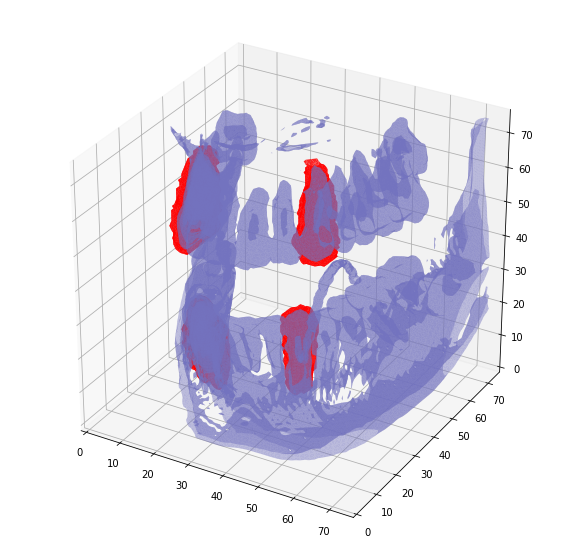

In [16]:
# Plot from Nifti dataset
nifti_jaw = nib.load(directory + sample_id + '.nii')
jaw = np.asarray(nifti_jaw.dataobj)

nifti_label = nib.load(directory + sample_id + '_label.nii')
label = np.asarray(nifti_label.dataobj)

ct_utils.plot_3d_with_labels(jaw, label, threshold=1200, transpose=[2, 1, 0], step_size=1)

In [21]:
sample = 0
# first_sample = ct_utils.load_scan(paths_to_samples[1])
first_sample = ct_utils.load_scan(data_pair_paths[sample]['data'])
first_sample_pixels = ct_utils.convert_to_hounsfield(first_sample)
nifti = nib.load(data_pair_paths[sample]['label'])
label = np.asarray(nifti.dataobj)
label = label.transpose(2, 1, 0)

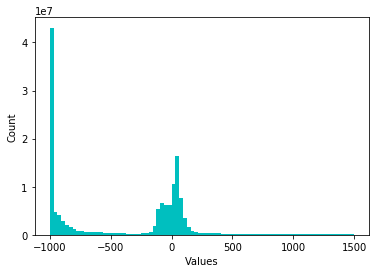

In [22]:
# # Show histogram of Hounsfield density bins
ct_utils.plot_volume_histogram(first_sample_pixels, bins=80, range=(-1000, 1500) ,color='c')

# # Show some slice in the middle
# plt.imshow(first_sample_pixels[80], cmap=plt.cm.gray)
# plt.show()

In [23]:
# Resample volume
spacing = ct_utils.get_dicom_spacing(first_sample)
pix_resampled, _ = ct_utils.resample(first_sample_pixels, spacing)
label_resampled, _ = ct_utils.resample(label, spacing)
print("Data before resampling\t", first_sample_pixels.shape)
print("Label before resampling\t", label.shape)
print("Data after resampling\t", pix_resampled.shape)
print("Label after resampling\t", label_resampled.shape)

Data before resampling	 (718, 512, 512)
Label before resampling	 (718, 512, 512)
Data after resampling	 (359, 278, 278)
Label after resampling	 (359, 278, 278)


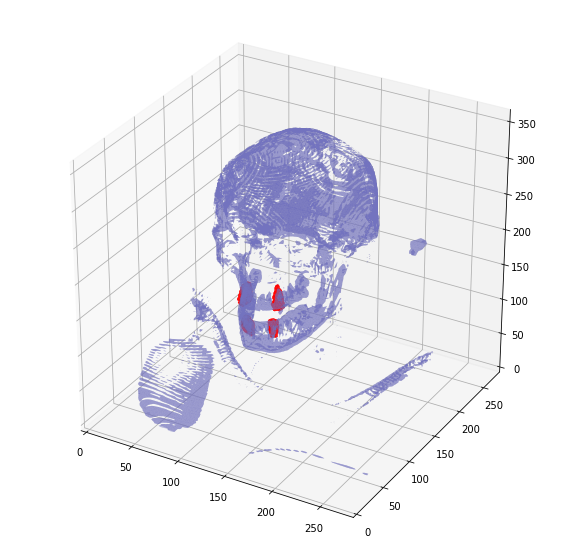

In [24]:
# ct_utils.plot_3d(pix_resampled, 1200, [2, 1, 0], 2)
# ct_utils.plot_3d(label_resampled, 0, [2, 1, 0])
ct_utils.plot_3d_with_labels(pix_resampled, label_resampled, 1200, [2, 1, 0], 2)

In [81]:
# vv = visualize_volumes.ImageSliceViewer3D(pix_resampled)
# ct_utils.make_gifs(pix_resampled, "test_gif", "axial")

![SegmentLocal](test_gif_axial.gif "segment")

In [89]:
min_box, max_box = ct_utils.jaw_isolation(pix_resampled, iterations=4, growth_rate=.98, size=[75, 75, 75])
jaw_isolated = ct_utils.extract_roi(pix_resampled, min_box, max_box)
label_isolated = ct_utils.extract_roi(label_resampled, min_box, max_box)
print(jaw_isolated.shape)

(75, 75, 75)


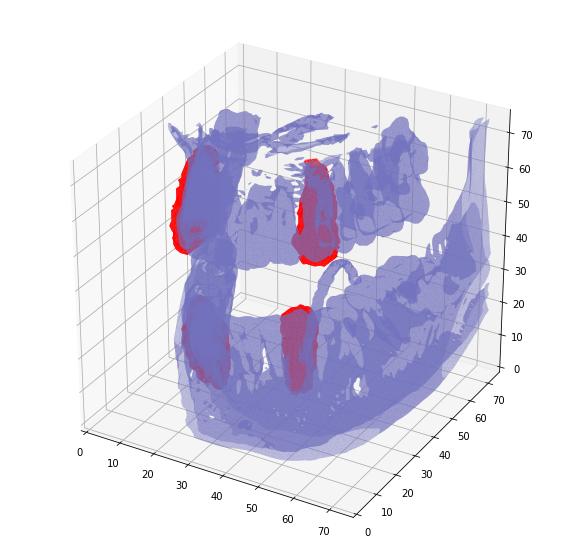

In [90]:
ct_utils.plot_3d_with_labels(jaw_isolated, label_isolated, 1000, [2, 1, 0], 1)

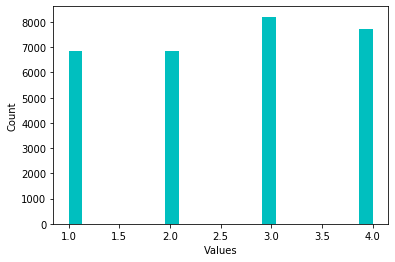

In [84]:
ct_utils.plot_volume_histogram(label, bins=22, range=[1, 4] ,color='c')

In [85]:
# Normalize the image between selected HU units

MIN_BOUND = 1000.0
MAX_BOUND = 2000.0

def normalize(image):
    image = (image - MIN_BOUND) / (MAX_BOUND - MIN_BOUND)
    image[image>1] = 1.
    image[image<0] = 0.
    return image

In [86]:
PIXEL_MEAN = 0.25

def zero_center(image):
    image = image - PIXEL_MEAN
    return image